In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!/opt/bin/nvidia-smi
!nvcc --version

Tue Nov 12 08:01:01 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!/opt/bin/nvidia-smi
!nvcc --version

Tue Nov 12 08:01:03 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
# Imports for diverse utilities
from shutil import copyfile
import matplotlib.pyplot as plt
import operator
from PIL import Image
from sys import intern   # For the symbol definitions

In [0]:
!pip install fastai

import fastai
from fastai import *
from fastai.vision import *

In [0]:
conda install -c fastai fastai=1.0.55

SyntaxError: ignored

In [0]:
# Export network for deployment and create a copy
def exportStageTo(learn, path):
    learn.export()
    # Faça backup diferenciado
    copyfile(path/'export.pkl', path/'export-malaria.pkl')
    
#exportStage1(learn, path)
# Restoration of a deployment model, for example in order to conitnue fine-tuning
def restoreStageFrom(path):
  # Restore a backup
  copyfile(path/'export-malaria.pkl', path/'export.pkl')
  return load_learner(path)
  
#learn = restoreStage1From(path)

In [0]:
!pip install kaggle

MessageError: ignored

In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"chrissponagle","key":"1f7074895924544ed1c11d8b62e3c38c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           7127  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          13068  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           4368  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactions                  267MB  2019-11-08 01:18:21           3906  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                 

In [0]:
!mkdir .kaggle
!mv kaggle.json .kaggle
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

mkdir: cannot create directory ‘.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
- path is now set to: {/content}


In [0]:
!mkdir data
!kaggle datasets download kmader/skin-cancer-mnist-ham10000 -p data

mkdir: cannot create directory ‘data’: File exists
skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Unzip the whole zipfile into /content/data
!unzip -o data/skin-cancer-mnist-ham10000.zip -d data
!echo files in /content/data: `ls data | wc -l`

unzip:  cannot find or open data/skin-cancer-mnist-ham10000.zip, data/skin-cancer-mnist-ham10000.zip.zip or data/skin-cancer-mnist-ham10000.zip.ZIP.
ls: cannot access 'data': No such file or directory
files in /content/data: 0


In [0]:
!echo files in /content/data: `ls data | wc -l`

ls: cannot access 'data': No such file or directory
files in /content/data: 0


In [0]:
!cd data

In [0]:
!mv  -v data/ham10000_images_part_1/* data/

In [0]:
!echo files in /content/data: `ls data | wc -l`

In [0]:
bs = 64        # Batch size, 64 for medium images on a T4 GPU...
size = 448      # Image size, 448x448 is double than the orignal 
                # ImageNet
path = Path("./data")   # The path to the 'train' folder you created...
# Limit your augmentations: it's medical data! You do not want to phantasize data...
# Warping, for example, will let your images badly distorted, so don't do it!
# This dataset is big, so don't rotate the images either. Lets stick to flipping...
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_rotate=None, max_warp=None, max_zoom=1.0)
# Create the DataBunch!
# Remember that you'll have images that are bigger than 128x128 and images that are smaller,   
# so squish them all in order to occupy exactly 128x128 pixels...
data = ImageDataBunch.from_csv('data', csv_labels='HAM10000_metadata.csv', suffix='.jpg', fn_col=1, label_col=2, 
                               ds_tfms=tfms, valid_pct = 0.2,size=size, bs=bs)
print('Transforms = ', len(tfms))
# Save the DataBunch in case the training goes south... so you won't have to regenerate it..
# Remember: this DataBunch is tied to the batch size you selected. 
data.save('imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')
# Show the statistics of the Bunch...
print(data.classes)
data

Transforms =  2
['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


ImageDataBunch;

Train: LabelList (8012 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
bkl,bkl,bkl,bkl,bkl
Path: data;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
nv,bkl,nv,vasc,nv
Path: data;

Test: None

In [0]:
!echo files in /content/data: `ls data | wc -l`

files in /content/data: 10028


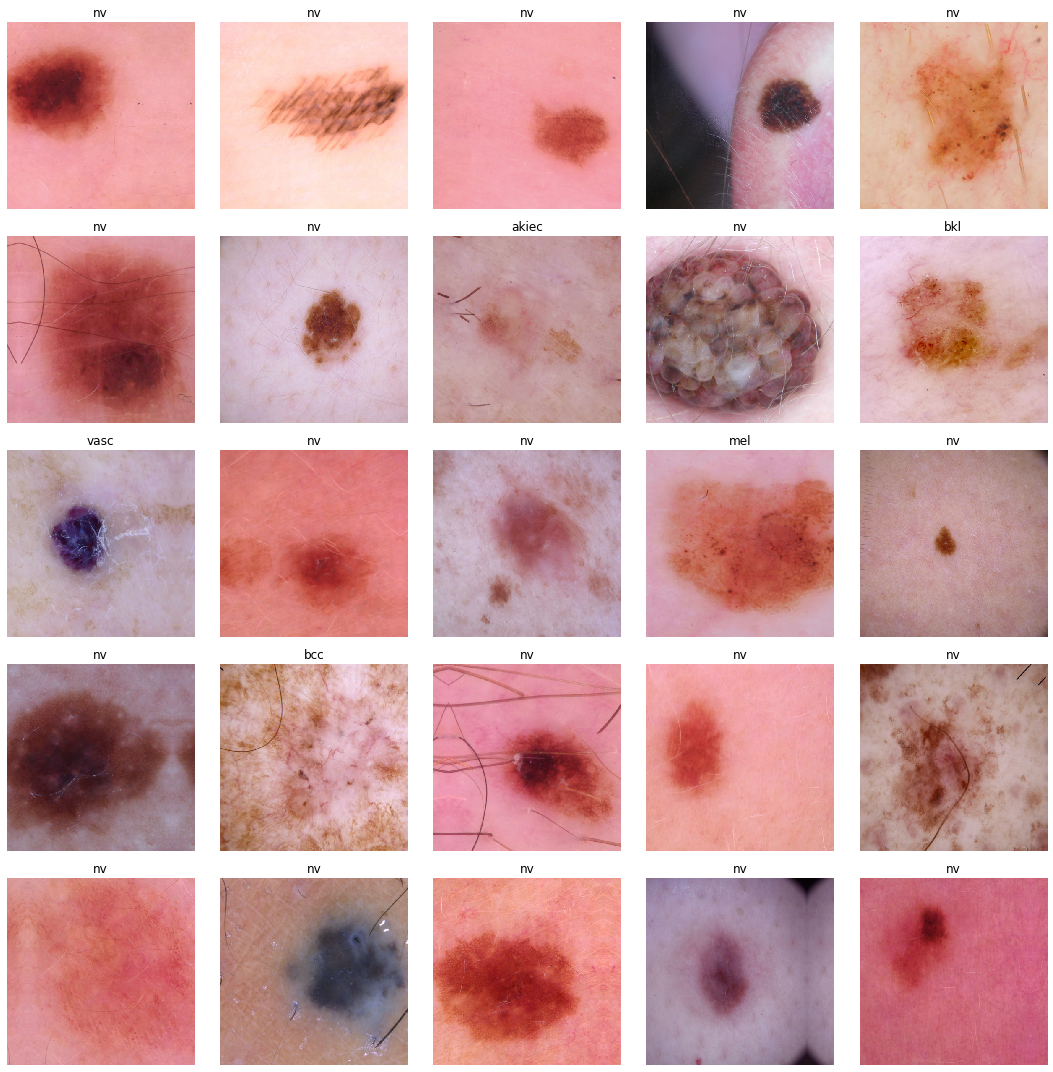

In [0]:
data.show_batch(rows=5, figsize=(15,15))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate, fbeta])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='derma-1')])
# Salve a rede (necessita regerar o databunch caso a gente continue)
learn.save('derma-stage-1')
# Faça o deploy desta rede para podermos usar offline depois para fazer testes
exportStageTo(learn, path)

epoch,train_loss,valid_loss,accuracy,error_rate,fbeta,time


RuntimeError: ignored

In [0]:
!rm -d /content/data/skin-cancer-mnist-ham10000.zip

In [0]:
!echo files in /content/data: `ls data | wc -l`

ls: cannot access 'data': No such file or directory
files in /content/data: 0


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=False)

In [0]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=True)

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [0]:
learn.recorder.plot_metrics()

In [0]:
# Unfreeze the network
learn.unfreeze()
# Find optimum learning rates
learn.lr_find()
# Include suggestion=True in order to obtain a suggestion on where to look...
learn.recorder.plot(suggestion=True)

In [0]:
# Unfreeze the network
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(1e-4,1e-5), 
                    callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='derma')])
# Agora, salve como estágio 2...
# learn.save('derma-stage-2')
# Deploy definitivo
# exportStageTo(learn, path)

In [0]:
learn = fit_one_cycle(data, layers=[500,250], metrics=[accuracy])

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
# Test to see if there's not anything missing (must return True)
len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [0]:
learn.recorder.plot_losses